# How to extract tangled information from Excel?

####  Working for a company I have to research historical infomation of local sugar prices. So I found a webpage were prices are reported in a weekly basis informing daily variation. 
#### The main problem is that information is presented in a horrible way and cannot get a direct way to generate historical price variation line chart or do comparison. 
#### So, I develop an algorithm in Python to get that information in a tidy way. 

#### Import libraries

In [70]:
import pandas as pd
import openpyxl
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt

#### Upload of base file 

In [71]:
file_base = pd.read_excel("C:\\Documentos\\archivo azucar local\\azucar actualizado.xlsx")

##### Next we can show how data is presented. Theres is tangled, there are a lot of NaN values, data format is not the best.

In [73]:
print(file_base)

                                            Unnamed: 0   Unnamed: 1  \
0    PRECIO ESTIMADO POR BOLSA (COMUN TIPO A) DE 50...          NaN   
1                                                  NaN          NaN   
2                                                  NaN          NaN   
3                                                Fecha         50Kg   
4                                                  NaN          NaN   
..                                                 ...          ...   
716                                2023-01-29 00:00:00         9200   
717                                2023-01-30 00:00:00         9250   
718                                2023-01-31 00:00:00         9250   
719                                           Promedio  8252.419355   
720                                        Variac prom     0.178564   

     Unnamed: 2  Unnamed: 3  Unnamed: 4 Unnamed: 5 Unnamed: 6    Unnamed: 7  \
0           NaN         NaN         NaN        NaN        NaN       

#### Convertion process will be shown:
##### 1) Convert to Pandas dataframe

In [74]:
file_df = pd.DataFrame(file_base)

##### 2) We select the dates and prices locating them on the file

In [75]:
fechas1 = file_df.iloc[689:719, 0]
datos1 = file_df.iloc[689:719, 3]

fechas2 = file_df.iloc[688:719, 6]
datos2 = file_df.iloc[688:719, 9]

fechas3 = file_df.iloc[688:719, 12]
datos3 = file_df.iloc[688:719, 15]

fechas4 = file_df.iloc[688:719, 18]
datos4 = file_df.iloc[688:719, 21]

##### 3) Generate a dataframe with dates

In [95]:
fecha = pd.DataFrame(
  fechas1.append(fechas2, ignore_index=True).append(
    fechas3, ignore_index=True).append(
    fechas4, ignore_index=True))


C:\Users\dalma\AppData\Local\Temp\ipykernel_9224\1669808148.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fechas1.append(fechas2, ignore_index=True).append(


##### 4) Put prices in a dataframe

In [97]:
precio = pd.DataFrame(
  datos1.append(datos2, ignore_index=True).append(datos3, ignore_index=True).append(datos4, ignore_index=True))

C:\Users\dalma\AppData\Local\Temp\ipykernel_9224\713458459.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datos1.append(datos2, ignore_index=True).append(datos3, ignore_index=True).append(datos4, ignore_index=True))


##### 5) Generate a new df concatenating both, prices and dates. Then clean the NaN values

In [98]:
nuevo_df = pd.concat({'Fecha': fecha, 'Precio': precio}, axis=1)

In [104]:
nuevo_df = nuevo_df.dropna()

In [105]:
nuevo_df.head(100)

,Fecha,Precio
,0,0
0,2023-01-02,123.966942
1,2023-01-03,125.619835
2,2023-01-04,127.272727
3,2023-01-05,129.669421
4,2023-01-06,129.752066
...,...,...
98,2023-04-07,216.528926
99,2023-04-08,217.355372
100,2023-04-09,218.181818


#### As we can see above we have a dataframe with dates and prices clean. So now we can work with them, for example check pice tendency in a line chart, as shown next 

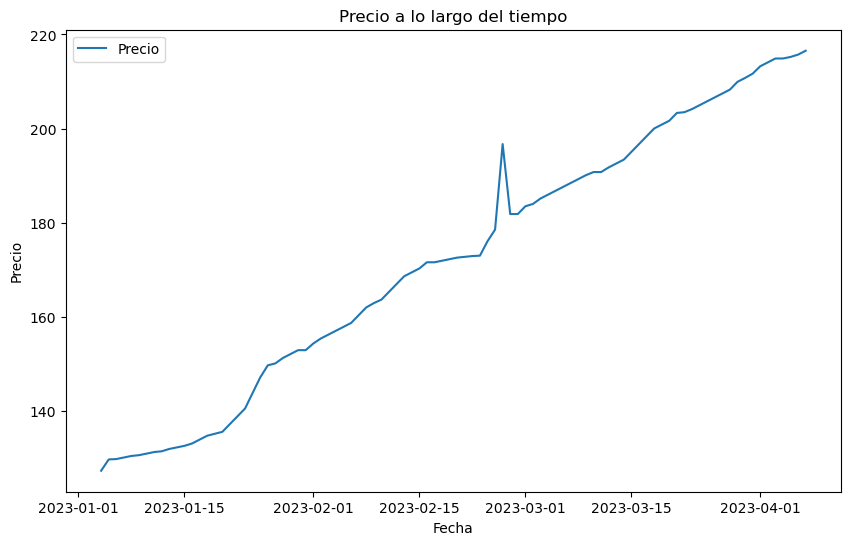

In [103]:
df_subset = nuevo_df.loc[2:98, ['Fecha', 'Precio']]
fechas_subset = df_subset['Fecha']
precios_subset = df_subset['Precio']

plt.figure(figsize=(10,6))

plt.plot(fechas_subset, precios_subset, label='Precio')
plt.title('Precio a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()